# 01_eda

## Importando bibliotecas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

## Carregando os dados

In [2]:
# Carregar os dados
df = pd.read_csv("../data/raw/Reviews.csv")
display(df.head(), df.shape)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


(568454, 10)

## Processamento

In [3]:
# Selecionar apenas colunas necessárias
df = df[['Score', 'Text']]

In [4]:
# Remover avaliações neutras (Score == 3)
df = df[df['Score'] != 3]

In [5]:
# Criar coluna de sentimento binário: 1 = positivo, 0 = negativo
df['Sentiment'] = df['Score'].apply(lambda x: 1 if x > 3 else 0)

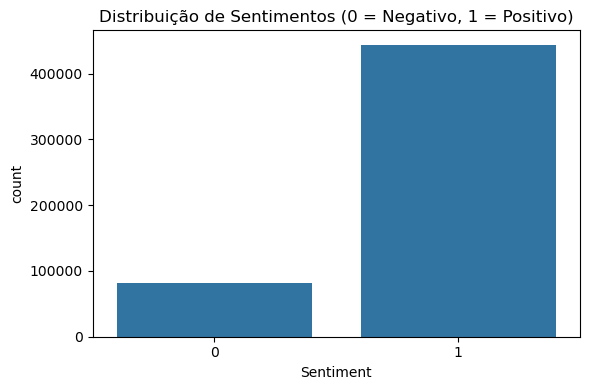

In [6]:
# Visualização da distribuição
plt.figure(figsize=(6, 4))  # Tamanho reduzido
sns.countplot(data=df, x='Sentiment')
plt.title('Distribuição de Sentimentos (0 = Negativo, 1 = Positivo)')
plt.tight_layout()  # Evita que elementos do gráfico sejam cortados

# Salva o gráfico
plt.savefig('../reports/figures/count_sentimentos.png', dpi=300)

# Exibe no notebook
plt.show()


In [7]:
# Nuvem de palavras
positive_text = " ".join(df[df['Sentiment'] == 1]['Text'].astype(str).tolist())
negative_text = " ".join(df[df['Sentiment'] == 0]['Text'].astype(str).tolist())

wordcloud_pos = WordCloud(width=800, height=400, background_color='white').generate(positive_text)
wordcloud_neg = WordCloud(width=800, height=400, background_color='black').generate(negative_text)

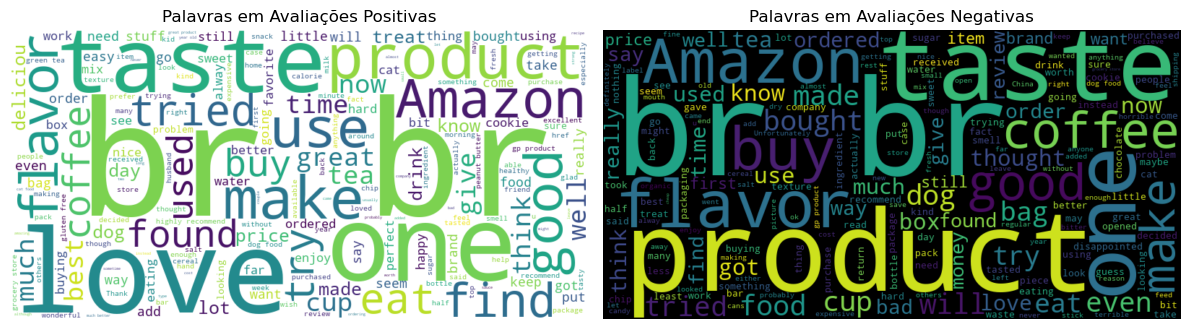

In [8]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.title('Palavras em Avaliações Positivas')

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis('off')
plt.title('Palavras em Avaliações Negativas')

plt.tight_layout()
plt.savefig('../reports/figures/wordcloud_sentimentos.png', dpi=300)
# Exibe no notebook
plt.show()